In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

In [30]:
from nltk.corpus import stopwords

In [73]:
data = pd.read_csv('data.csv')

In [32]:
data['Claim Cost'] = pd.to_numeric(data['Claim Cost'], errors='coerce')

In [33]:
data['Litigation '] = data['Litigation '].str.lower()

In [34]:
high_cost = data[data['High Cost'] == 1]

In [35]:
high_lit = high_cost[high_cost['Litigation '] == 'yes']

In [36]:
high_lit = high_lit[high_lit['Cause Description'].notnull()]

In [21]:
cause = ' '.join(map(str, high_lit['Cause Description']))

In [27]:
# addding extra words to stopwords list
custom_stopwords = list(STOPWORDS) + ['state', 'states', 'patient']

In [28]:
wordcloud = WordCloud(stopwords=custom_stopwords, width = 800, height = 800, 
background_color ='white', 
min_font_size = 20).generate(cause) 

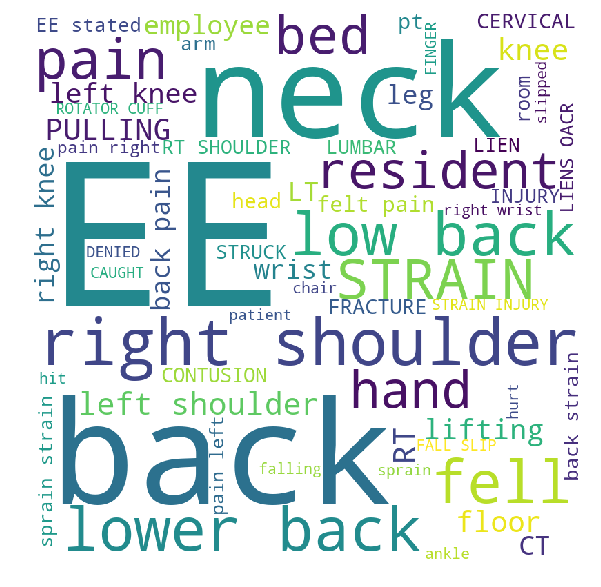

In [29]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

In [22]:
loss_type = high_cost.groupby(['Loss Type']).size().reset_index()

In [23]:
loss_type.columns = ['name', 'value']

In [26]:
loss_type.to_dict(orient='records')

[{'name': 'Indemnity', 'value': 4028L},
 {'name': 'Medical Only', 'value': 1781L},
 {'name': 'Notice Only', 'value': 2L},
 {'name': 'Unknown', 'value': 6L}]

In [71]:
sector_group = high_lit.groupby(['Sector/Industry','Occupation'], sort=True).sum().reset_index()

In [72]:
sector_group

,Sector/Industry,Occupation,Unique_ID,Claim Cost,High Cost
0,Consumer Disc,AQUATICS,76516,164356.0,2
1,Consumer Disc,Banquet Server,35743,893271.0,1
2,Consumer Disc,Bellman,35672,43043.0,1
3,Consumer Disc,CHILD CTR/KIDS ACTVY,149836,202749.0,4
4,Consumer Disc,Director of Security,35473,122726.0,1
5,Consumer Disc,ENGINEER,71678,96199.0,2
6,Consumer Disc,ENGINEERING,111301,225738.0,3
7,Consumer Disc,Engineer,35728,80956.0,1
8,Consumer Disc,FOOD SERVER,35765,112645.0,1
9,Consumer Disc,FRONT DESK,78725,58367.0,2


In [52]:
sector_group.sort_values(by=['Sector/Industry', 'Claim Cost'],ascending=[True,False])

,Sector/Industry,Occupation,Unique_ID,Claim Cost,High Cost
18,Consumer Disc,OPERATIONS,946881,2550202.0,25
19,Consumer Disc,PERSONAL TRAINING,683934,1719947.0,18
1,Consumer Disc,Banquet Server,35743,893271.0,1
15,Consumer Disc,LIFE SPA,495674,833645.0,13
14,Consumer Disc,LIFE CAFE,263982,407610.0,7
11,Consumer Disc,GROUP FITNESS,114346,389621.0,3
12,Consumer Disc,Housekeeper,35491,376522.0,1
24,Consumer Disc,SALES,114694,366347.0,3
17,Consumer Disc,Line Cook III,35422,259690.0,1
6,Consumer Disc,ENGINEERING,111301,225738.0,3


In [70]:
high_lit.groupby(['Sector/Industry','Occupation'])

Sector/Industry  Occupation            
Industrials      GROUND OPERATIONS         29
                 INFLIGHT CREW             27
Consumer Disc    OPERATIONS                25
                 PERSONAL TRAINING         18
Industrials      CUSTOMER SERVICE AGENT    18
Consumer Disc    LIFE SPA                  13
Materials        UTILITY                   12
                 GENERAL LABORER           10
Industrials      TECHNICIAN                 9
Materials        FORKLIFT OPERATOR          8
dtype: int64